In [28]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [29]:
data.columns


Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [31]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [32]:
#cheking for the null values
data.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('data.csv')

# Split features and target variable for classification
threshold = 0.5  # Define threshold for classification
y_cls = (data["energy"] > threshold).astype(int)
X_cls = data.drop(columns=["energy", "song_title", "artist"])

# Train-test split for classification
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_cls_train_scaled = scaler.fit_transform(X_cls_train)
X_cls_test_scaled = scaler.transform(X_cls_test)

# Define and train MLPClassifier
cls_model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42)
cls_model.fit(X_cls_train_scaled, y_cls_train)

# Predict and evaluate
cls_pred = cls_model.predict(X_cls_test_scaled)
cls_accuracy = accuracy_score(y_cls_test, cls_pred)
cls_report = classification_report(y_cls_test, cls_pred)
print("Classification Accuracy:", cls_accuracy)
#print("Classification Report:\n", cls_report)


Classification Accuracy: 0.905940594059406


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


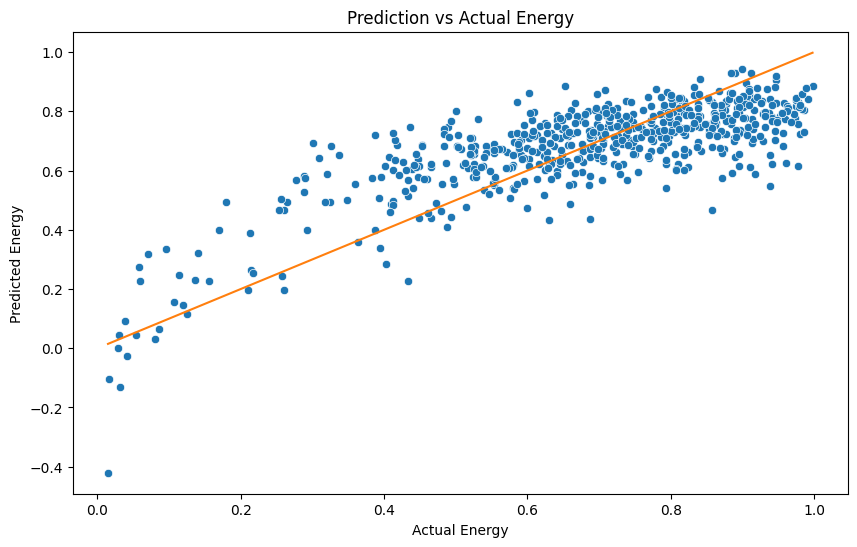

In [35]:
from sklearn.metrics import r2_score
x = data[['loudness', 'valence']]
y = data[['energy']]
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# Building a Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)
# Predicting
y_pred = regressor.predict(x_test)
# Checking the score
score = r2_score(y_test, y_pred)
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test['energy'].values.flatten(), y=y_pred.flatten())
sns.lineplot(x=y_test['energy'].values.flatten(), y=y_test['energy'].values.flatten(), color="tab:orange")
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.title('Prediction vs Actual Energy')
plt.show()


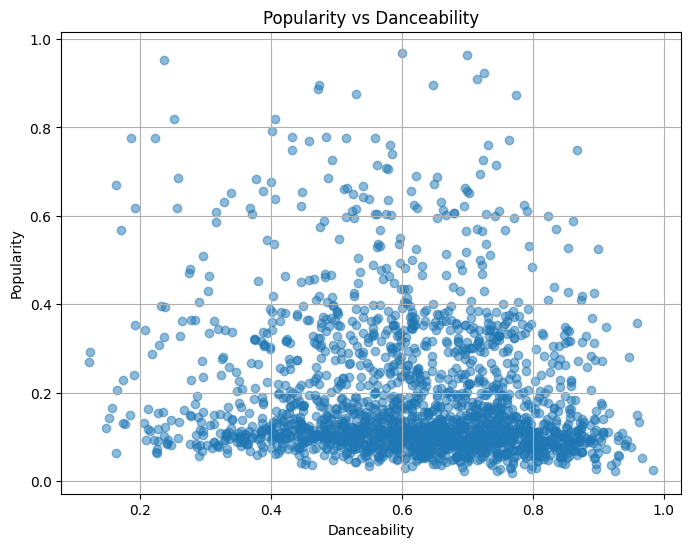

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8, 6))
plt.scatter(data['danceability'], data['liveness'], alpha=0.5)
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

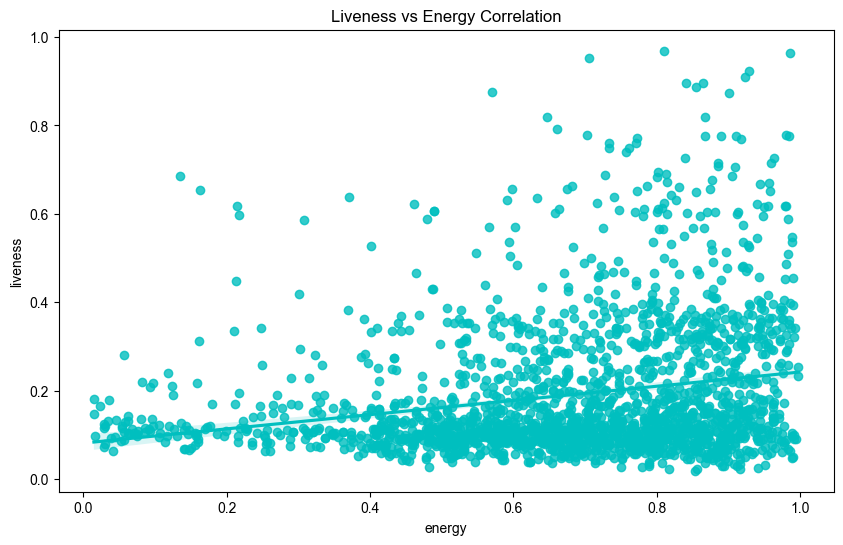

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('data.csv')
plt.figure(figsize=(10, 6))  # Corrected figsize argument

# Assuming 'data' is your DataFrame
sns.regplot(data=data, y="liveness", x="energy", color="c").set(title="Liveness vs Energy Correlation")

# Show the plot
plt.show()

<Axes: >

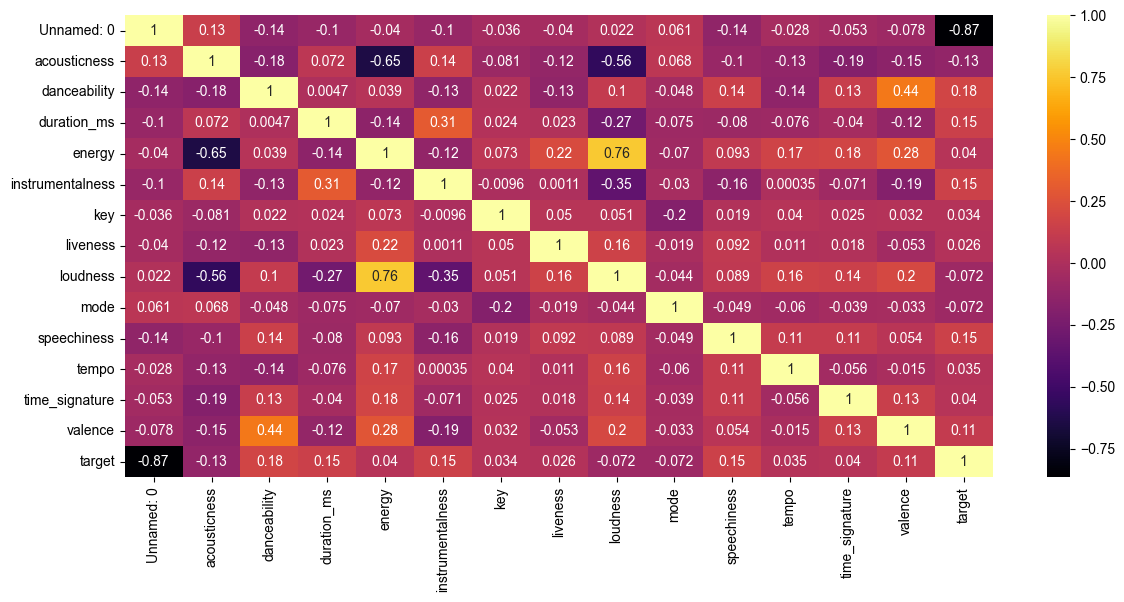

In [41]:
#corellation of all data
fig=plt.figure(figsize=(14,6))
sns.heatmap(data.corr(numeric_only=True),cmap="inferno",annot=True)

Epoch 1/5
26/26 - 2s - loss: 0.6417 - accuracy: 0.7880 - val_loss: 0.5878 - val_accuracy: 0.8886 - 2s/epoch - 87ms/step
Epoch 2/5
26/26 - 0s - loss: 0.5374 - accuracy: 0.9219 - val_loss: 0.4827 - val_accuracy: 0.9257 - 111ms/epoch - 4ms/step
Epoch 3/5
26/26 - 0s - loss: 0.4281 - accuracy: 0.9448 - val_loss: 0.3746 - val_accuracy: 0.9455 - 110ms/epoch - 4ms/step
Epoch 4/5
26/26 - 0s - loss: 0.3196 - accuracy: 0.9678 - val_loss: 0.2768 - val_accuracy: 0.9629 - 110ms/epoch - 4ms/step
Epoch 5/5
26/26 - 0s - loss: 0.2293 - accuracy: 0.9795 - val_loss: 0.2015 - val_accuracy: 0.9752 - 113ms/epoch - 4ms/step


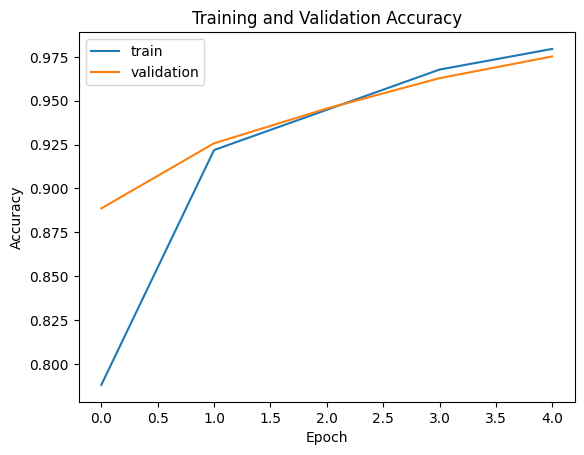

13/13 [==============================] - 0s 2ms/step
Classification Accuracy: 0.9752475247524752


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv('data.csv')

# Split features and target variable for classification
threshold = 0.5  # Define threshold for classification
y_cls = (data["instrumentalness"] > threshold).astype(int)
X_cls = data.drop(columns=["tempo", "song_title", "artist"])

# Train-test split for classification
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_cls_train_scaled = scaler.fit_transform(X_cls_train)
X_cls_test_scaled = scaler.transform(X_cls_test)

# Convert features to sequence
X_train_seq = X_cls_train_scaled.reshape((X_cls_train_scaled.shape[0], 1, X_cls_train_scaled.shape[1]))
X_test_seq = X_cls_test_scaled.reshape((X_cls_test_scaled.shape[0], 1, X_cls_test_scaled.shape[1]))

# Build the RNN model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_seq, y_cls_train, epochs=5, batch_size=64, validation_data=(X_test_seq, y_cls_test), verbose=2)
# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
# Evaluate the model
# Predict on the test set
y_pred_proba = model.predict(X_test_seq)
y_pred = (y_pred_proba > 0.5).astype(int)
# Evaluate the model
cls_accuracy = accuracy_score(y_cls_test, y_pred)
print("Classification Accuracy:", cls_accuracy)




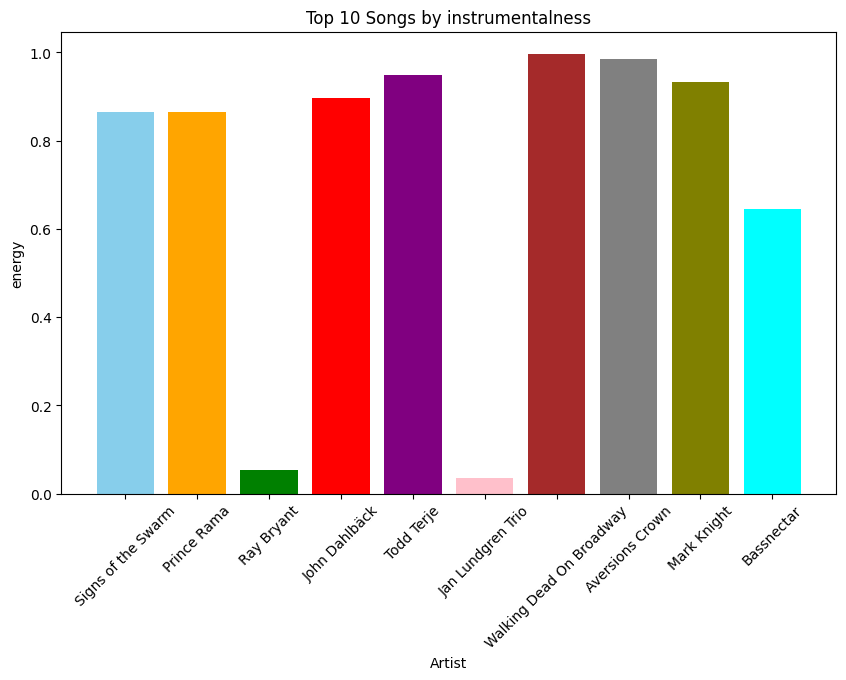

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming your data is stored in a DataFrame called df
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
top_10 = df.nlargest(10, 'instrumentalness')
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']
plt.figure(figsize=(10, 6))
plt.bar(top_10['artist'], top_10['energy'], color=colors)
plt.xlabel('Artist')
plt.ylabel('energy')
plt.title('Top 10 Songs by instrumentalness')
plt.xticks(rotation=45)
plt.show()


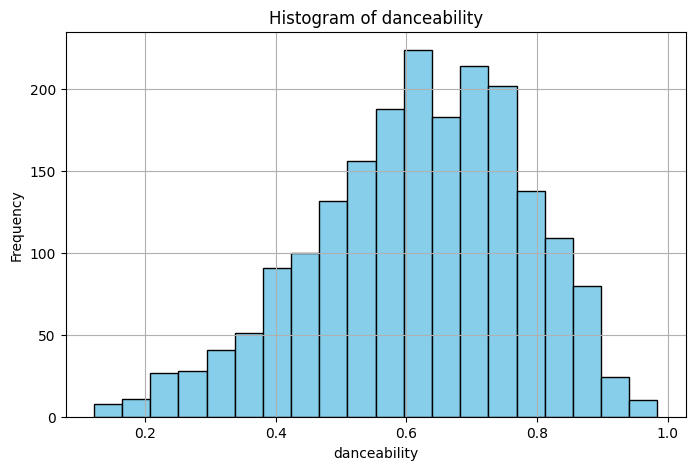

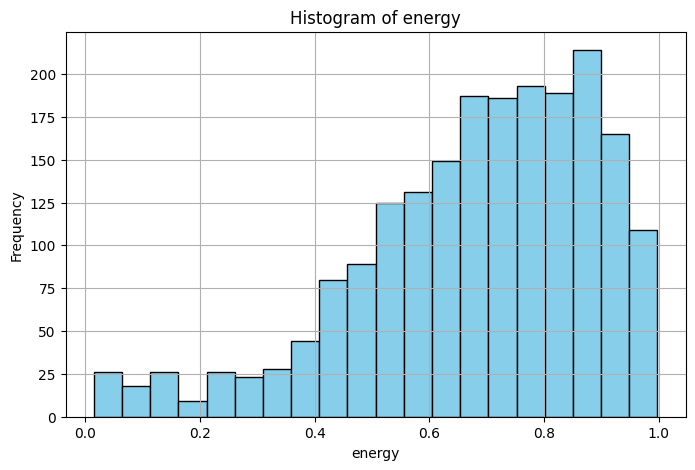

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame with the provided data
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)

# Columns for which we'll plot histograms
columns_to_plot = ['danceability', 'energy']

# Plotting histograms
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('data.csv')

# Define threshold for classification
threshold = 0.5

# Create binary labels based on the threshold
y_cls = (data["energy"] > threshold).astype(int)
X_cls = data.drop(columns=["Loudness", "song_title", "artist"])

# Train-test split for classification
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_cls_train_scaled = scaler.fit_transform(X_cls_train)
X_cls_test_scaled = scaler.transform(X_cls_test)

# Create and train the logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_cls_train_scaled, y_cls_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_cls_test_scaled)

# Evaluate the model
cls_accuracy = accuracy_score(y_cls_test, y_pred)
print("Classification Accuracy:", cls_accuracy)


Classification Accuracy: 0.9876237623762376


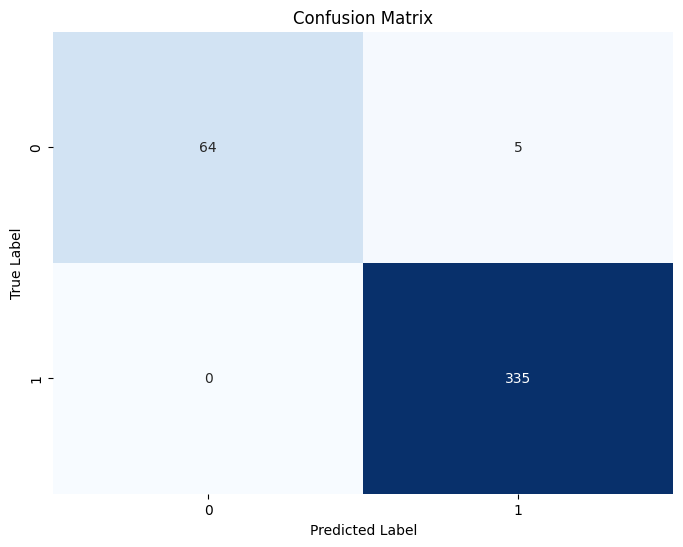

In [9]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_cls_test, y_pred)

#Plot the confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.title('Confusion Matrix')

plt.show()
